In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import pymc3 as pm
import scipy as sp
import pyccl as ccl
import os
import utils
import make_data
import getdist
from getdist import plots, MCSamples
%matplotlib inline

# Load data

In [68]:
names_planck  = ['H', 'Omega_m', 'sigma8']
labels_planck = ['H', r'\Omega_{\rm{m}}', r'\sigma_{\rm{8}}']

planck1 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_1.txt')
planck2 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_2.txt')
planck3 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_3.txt')
planck4 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_4.txt')

planck_tot = np.concatenate((planck1, planck2, planck3, planck4), axis=0)

planck_params = []
for item in planck_tot:
    planck_params.append([item[29], item[31], item[34]])
planck_params = np.array(planck_params)
planck= MCSamples(samples=planck_params, names = names_planck, labels = labels_planck, label= r'$Planck$ 2018',
                    weights=np.transpose(planck_tot)[0],loglikes=np.transpose(planck_tot)[1])

Removed no burn in


In [69]:
z_max = 1110
res = 200
x_arr = np.linspace(0, np.log(1+z_max), res)
dx = np.mean(np.diff(x_arr))
z_arr = np.exp(x_arr)-1
a_arr = 1./(1+z_arr)

path = '/home/jaimerz/PhD/Growz/data/products'

data = make_data.make_data(z_max, res , path)
Planck = data.Planck
z_planck = data.z_planck
c = data.c

DESI_data = data.get_DESI(new=True, mode=None)
H_DESI_data = data.get_DESI(new=True, mode='H')
dA_DESI_data = data.get_DESI(new=True, mode='dA')
fs8_DESI_data = data.get_DESI(new=True, mode='fs8')
WFIRST_data = data.get_WFIRST(new=True)
CC_data = data.get_CC(new=True)
DSS_data = data.get_DSS(new=True)
BOSS_data = data.get_BOSS(new=True)
eBOSS_data = data.get_eBOSS(new=True)
Wigglez_data = data.get_Wigglez(new=True)
DS17_data = data.get_DS17(new=True)
CMB_data = data.get_CMB(new=True)
FCMB_data = data.get_FCMB(new=True)

In [70]:
def get_m_s(rows):
    cols = np.transpose(rows)
    means = np.array([])
    sigmas = np.array([])
    for col in cols:
        mean = np.mean(col)
        sigma = np.std(col)
        means = np.append(means, mean)
        sigmas = np.append(sigmas, sigma)
    return means, sigmas

In [71]:
path = '/home/jaimerz/PhD/Growz/data/outputs/'
CC_DS17_BOSS_eBOSS_Wigglez_DSS = np.load(os.path.join(path,'mean_gp/CC_DS17_BOSS_eBOSS_Wigglez_DSS_1000_2500/samples.npz'))
CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB = np.load(os.path.join(path,'mean_gp/CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB_1000_2500/samples.npz'))
CC_DS17_Wigglez_DSS = np.load(os.path.join(path,'mean_gp/CC_DS17_Wigglez_DSS_1000_2500/samples.npz'))
CC_DS17_Wigglez_DSS_CMB = np.load(os.path.join(path,'mean_gp/CC_DS17_Wigglez_DSS_1000_2500/samples.npz'))
DESI = np.load(os.path.join(path,'mean_gp/DESI_1000_2500/samples.npz'))
DESI_CMB = np.load(os.path.join(path,'mean_gp/DESI_CMB_1000_2500/samples.npz'))

In [76]:
DESI_CMB['s8z']

array([[-0.82281481, -0.80725664, -0.79137174, ..., -0.00181946,
        -0.00181564, -0.00181437],
       [-0.81361964, -0.79811351, -0.78234314, ..., -0.00182018,
        -0.00181637, -0.00181509],
       [-0.81778435, -0.80221226, -0.78633513, ..., -0.00183669,
        -0.00183284, -0.00183156],
       ...,
       [-0.82539843, -0.80991941, -0.79413829, ..., -0.00186816,
        -0.00186427, -0.00186296],
       [-0.81789626, -0.80229483, -0.7863966 , ..., -0.00184883,
        -0.001845  , -0.00184372],
       [-0.81891814, -0.80327468, -0.78733628, ..., -0.00185238,
        -0.00184848, -0.00184719]])

In [7]:
CC_DS17_BOSS_eBOSS_Wigglez_DSS_mean = np.load(os.path.join(path,'means/CC_DS17_BOSS_eBOSS_Wigglez_DSS_1000_2500_t/samples.npz'))
CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB_mean = np.load(os.path.join(path,'means/CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB_1000_2500_t/samples.npz'))
CC_DS17_Wigglez_DSS_mean = np.load(os.path.join(path,'means/CC_DS17_Wigglez_DSS_1000_2500_t/samples.npz'))
CC_DS17_Wigglez_DSS_CMB_mean = np.load(os.path.join(path,'means/CC_DS17_Wigglez_DSS_CMB_1000_2500_t/samples.npz'))

In [29]:
DESI_H_CMB = np.load(os.path.join(path,'H_DESI_CMB_1000_1000/samples.npz'))
DESI_H_dA_CMB = np.load(os.path.join(path,'H_DESI_dA_DESI_CMB_1000_1000/samples.npz'))
DESI_H_dA_fs8_CMB = np.load(os.path.join(path,'H_DESI_dA_DESI_fs8_DESI_CMB_1000_1000/samples.npz'))
DESI_H_dA_fs8 = np.load(os.path.join(path,'H_DESI_dA_DESI_fs8_DESI_1000_1000/samples.npz'))
DESI_FCMB = np.load(os.path.join(path,'DESI_FCMB_1000_1000/samples.npz'))

DESI_H_CMB_mean = np.load(os.path.join(path,'H_DESI_CMB_1000_1000_mean/samples.npz'))
DESI_H_dA_CMB_mean = np.load(os.path.join(path,'H_DESI_dA_DESI_CMB_1000_1000_mean/samples.npz'))
DESI_H_dA_fs8_CMB_mean = np.load(os.path.join(path,'H_DESI_dA_DESI_fs8_DESI_CMB_1000_1000_mean/samples.npz'))
DESI_H_dA_fs8_mean = np.load(os.path.join(path,'H_DESI_dA_DESI_fs8_DESI_1000_1000_mean/samples.npz'))

DESI_mean = np.load(os.path.join(path,'means/DESI_1000_2500_t/samples.npz'))
DESI_CMB_mean = np.load(os.path.join(path,'means/DESI_CMB_1000_2500_t/samples.npz'))
DESI_FCMB_mean = np.load(os.path.join(path,'DESI_FCMB_1000_1000_mean/samples.npz'))

In [11]:
labels_dict = {'n': '\eta',
               'l': 'l',
               'H0': 'H',
               'Omega_m': '\Omega_m',
               'Omega_b': '\Omega_b',
               'Omega_L': '\Omega_\Lambda',
               's80': '\sigma_8',
               'S80': 'S_8',
               'Omega_b': '\Omega_b', 
               'M': 'M'}
names_All = ['n', 'l', 'H', 'Omega_m', 'Omega_b', 'Omega_L',  's80', 'S80', 'M']
ranges = {'l':[0.0, 100]}

# Triangle Plots

In [12]:
def make_samples(file, names, ranges, label):
    samples = []
    for name in names:
        samples.append(file[name])
        
    labels = []
    for name in names:
        labels.append(labels_dict[name])
        
    return MCSamples(samples=samples, names=names, labels=labels, label=label, ranges=ranges)

In [17]:
#WFIRST_samples = make_samples(WFIRST, ['n', 'l', 'H0'], ranges, 'WFIRST')
DESI_samples = make_samples(DESI, ['n', 'l', 'H0', 'Omega_m', 's80', 'S80'], ranges, 'DESI')
DESI_CMB_samples = make_samples(DESI_CMB, ['n', 'l', 'H0', 'Omega_m',  'Omega_L', 's80', 'S80'], ranges, 'DESI+CMB')
#BOSS_eBOSS_samples = make_samples(BOSS_eBOSS, ['n', 'l', 'H0', 'Omega_m', 'Omega_b', 's80', 'S80'], ranges, 'BOSSS+eBOSS')
#BOSS_eBOSS_CMB_samples = make_samples(BOSS_eBOSS_CMB, ['n', 'l', 'H0', 'Omega_m', 'Omega_L', 'Omega_b', 's80', 'S80'], 
#                                      ranges, 'BOSSS+eBOSS+CMB')
CC_DS17_Wigglez_DSS_samples = make_samples(CC_DS17_Wigglez_DSS,
                                           ['n', 'l', 'H0', 'Omega_m', 's80', 'S80'],
                                           ranges, 'CC_DS17_Wigglez_DSS')
CC_DS17_BOSS_eBOSS_Wigglez_DSS_samples = make_samples(CC_DS17_BOSS_eBOSS_Wigglez_DSS,
                                                      ['n', 'l', 'H0', 'Omega_m', 'Omega_L', 'Omega_b', 's80', 'S80'],
                                                      ranges, 'CC_DS17_BOSS_eBOSS_Wigglez_DSS')
CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB_samples = make_samples(CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB,
                                                      ['n', 'l', 'H0', 'Omega_m', 'Omega_L', 'Omega_b', 's80', 'S80'],
                                                      ranges, 'CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


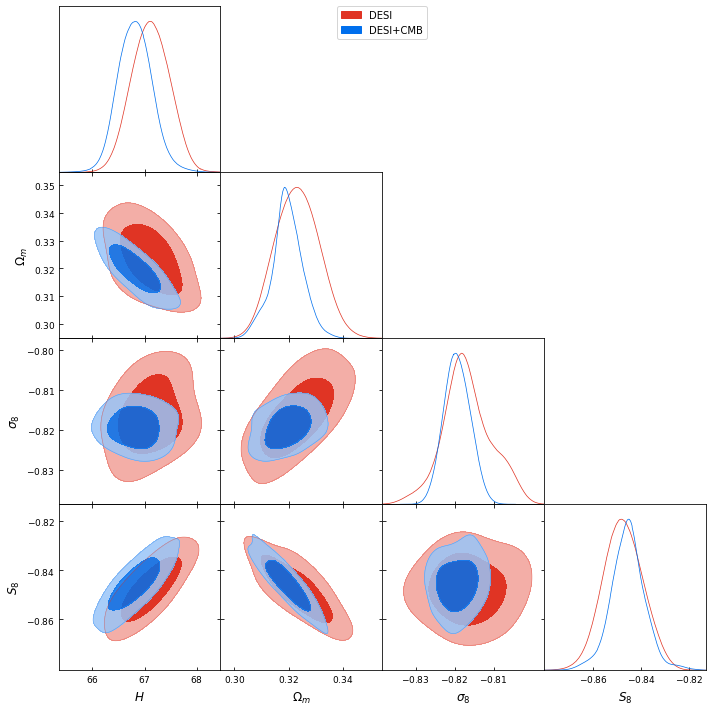

In [19]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([DESI_samples, DESI_CMB_samples],
                ['H0', 'Omega_m', 's80', 'S80'],
                filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/triangle_data.pdf')

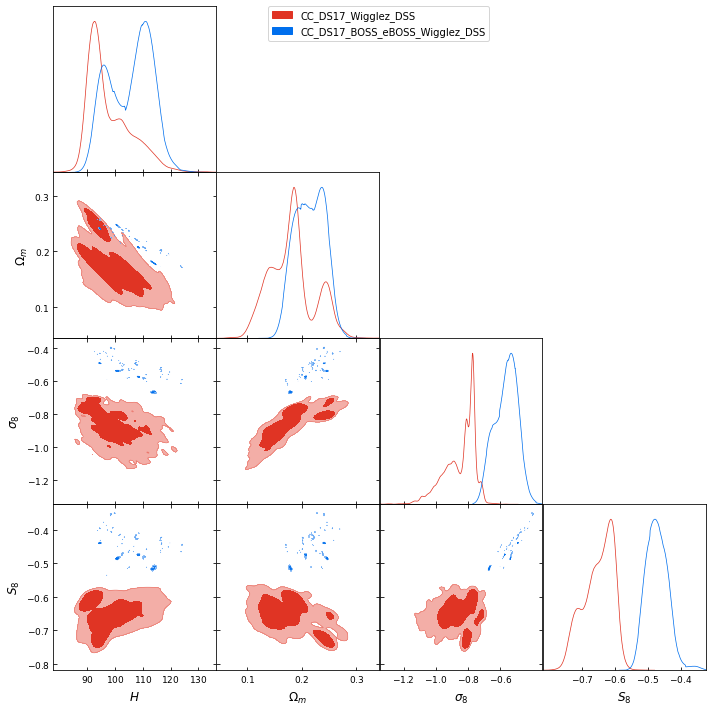

In [21]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([CC_DS17_Wigglez_DSS_samples, 
                 CC_DS17_BOSS_eBOSS_Wigglez_DSS_samples], 
                ['H0', 'Omega_m', 's80', 'S80'], 
                filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/triangle_data.pdf')

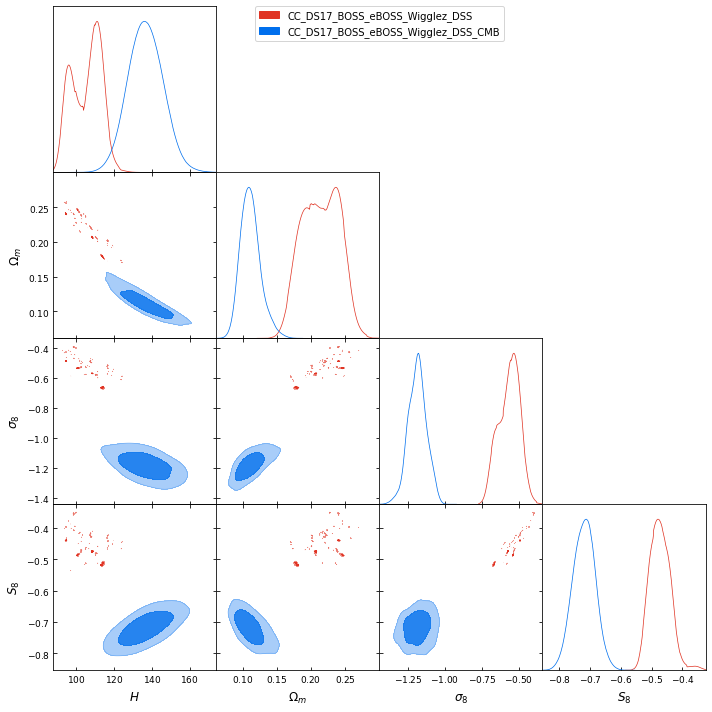

In [22]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([ CC_DS17_BOSS_eBOSS_Wigglez_DSS_samples,
                CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB_samples], 
                ['H0', 'Omega_m', 's80', 'S80'], 
                filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/triangle_data.pdf')

In [ ]:
#g = plots.getSubplotPlotter(subplot_size=2.5)
#g.triangle_plot([BOSS_eBOSS_samples, BOSS_eBOSS_CMB_samples], filled=True,
#                markers={'H0':67.3, 'Omega_m':0.31, 's80': 0.806, 'S80': 0.819 ,'Df': 0.044})
#g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/triangle_forecast.pdf')

# H gp 

In [30]:
H_All_m, H_All_s = get_m_s(CC_DS17_BOSS_eBOSS_Wigglez_DSS['Hz'])
H_All_CMB_m, H_All_CMB_s = get_m_s(CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB['Hz'])

H_All_mean_m, H_All_mean_s = get_m_s(CC_DS17_BOSS_eBOSS_Wigglez_DSS_mean['Hz'])
H_All_CMB_mean_m, H_All_CMB_mean_s = get_m_s(CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB_mean['Hz'])

H_CC_DS17_Wigglez_DSS_m, H_CC_DS17_Wigglez_DSS_s = get_m_s(CC_DS17_Wigglez_DSS['Hz'])
#H_BOSS_eBOSS_m, H_BOSS_eBOSS_s = get_m_s(BOSS_eBOSS['Hz'])
#H_BOSS_eBOSS_CMB_m, H_BOSS_eBOSS_CMB_s = get_m_s(BOSS_eBOSS_CMB['Hz'])
###
H_DESI_m, H_DESI_s = get_m_s(DESI['Hz'])
H_DESI_CMB_m, H_DESI_CMB_s = get_m_s(DESI_CMB['Hz'])
H_DESI_FCMB_m, H_DESI_FCMB_s = get_m_s(DESI_FCMB['Hz'])
###

H_DESI_H_CMB_m, H_DESI_H_CMB_s = get_m_s(DESI_H_CMB['Hz'])
H_DESI_H_dA_CMB_m, H_DESI_H_dA_CMB_s = get_m_s(DESI_H_dA_CMB['Hz'])
H_DESI_H_dA_fs8_CMB_m, H_DESI_H_dA_fs8_CMB_s = get_m_s(DESI_H_dA_fs8_CMB['Hz'])
H_DESI_H_dA_fs8_m, H_DESI_H_dA_fs8_s = get_m_s(DESI_H_dA_fs8['Hz'])

H_DESI_H_CMB_mean_m, H_DESI_H_CMB_mean_s = get_m_s(DESI_H_CMB_mean['Hz'])
H_DESI_H_dA_CMB_mean_m, H_DESI_H_dA_CMB_mean_s = get_m_s(DESI_H_dA_CMB_mean['Hz'])
H_DESI_H_dA_fs8_CMB_mean_m, H_DESI_H_dA_fs8_CMB_mean_s = get_m_s(DESI_H_dA_fs8_CMB_mean['Hz'])
H_DESI_H_dA_fs8_mean_m, H_DESI_H_dA_fs8_mean_s = get_m_s(DESI_H_dA_fs8_mean['Hz'])

H_DESI_mean_m, H_DESI_mean_s = get_m_s(DESI_CMB_mean['Hz'])
H_DESI_CMB_mean_m, H_DESI_CMB_mean_s = get_m_s(DESI_CMB_mean['Hz'])
H_DESI_FCMB_mean_m, H_DESI_FCMB_mean_s = get_m_s(DESI_FCMB_mean['Hz'])

Planck = data.Planck
z_planck = data.z_planck

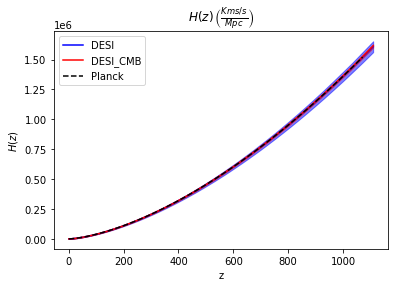

In [31]:
plt.plot(DESI['z_arr'],  H_DESI_m, color ='b', label='DESI')
plt.fill_between(DESI['z_arr'], H_DESI_m+H_DESI_s,
                 H_DESI_m-H_DESI_s, color='b', alpha=.5)

plt.plot(DESI_CMB['z_arr'],  H_DESI_CMB_m, color ='r', label='DESI_CMB')
plt.fill_between(DESI_CMB['z_arr'], H_DESI_CMB_m+H_DESI_CMB_s,
                 H_DESI_CMB_m-H_DESI_CMB_s, color='r', alpha=.5)


plt.plot(z_planck, Planck['Hkms_arr'], 'k--', label='Planck')

plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

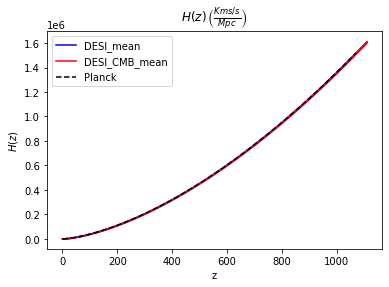

In [32]:
plt.plot(DESI_mean['z_arr'],  H_DESI_mean_m, color ='b', label='DESI_mean')
plt.fill_between(DESI_mean['z_arr'], H_DESI_mean_m+H_DESI_mean_s,
                 H_DESI_mean_m-H_DESI_mean_s, color='b', alpha=.5)


plt.plot(DESI_CMB_mean['z_arr'],  H_DESI_CMB_mean_m, color ='r', label='DESI_CMB_mean')
plt.fill_between(DESI_CMB_mean['z_arr'], H_DESI_CMB_mean_m+H_DESI_CMB_mean_s,
                 H_DESI_CMB_mean_m-H_DESI_CMB_mean_s, color='r', alpha=.5)

plt.plot(z_planck, Planck['Hkms_arr'], 'k--', label='Planck')

plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

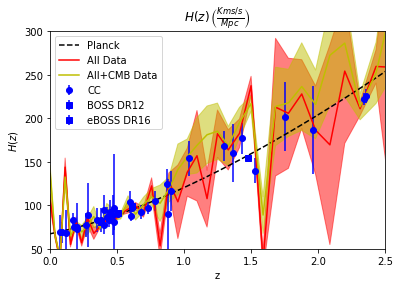

In [55]:
plt.plot(z_planck, Planck['Hkms_arr'], 'k--', label='Planck')

plt.errorbar(CC_data['z'], CC_data['data'], yerr = CC_data['err'], fmt='bo', label='CC')
plt.errorbar(BOSS_data['z'], BOSS_data['para_data'], yerr=BOSS_data['para_err'], fmt='bs', label='BOSS DR12')
plt.errorbar(eBOSS_data['z'], c/1000/(eBOSS_data['para_data']*eBOSS_data['rd']), 
             yerr = 1/eBOSS_data['rd']/(np.array([0.47])), fmt='bs', label='eBOSS DR16')

plt.plot(DESI_CMB['z_arr'],  H_All_m, color ='r', label='All Data')
plt.fill_between(DESI_CMB['z_arr'], H_All_m+H_All_s, H_All_m-H_All_s, color='r', alpha=.5)
plt.plot(DESI_CMB['z_arr'],  H_All_CMB_m, color ='y', label='All+CMB Data')
plt.fill_between(DESI_CMB['z_arr'], H_All_CMB_m+H_All_CMB_s, H_All_CMB_m-H_All_CMB_s, color='y', alpha=.5)


# axis labels and title
plt.xlim(0, 2.5)
plt.ylim(50, 300)
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_data.pdf')  

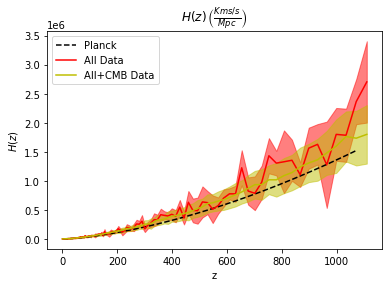

In [52]:
plt.plot(z_planck, Planck['Hkms_arr'], 'k--', label='Planck')

plt.plot(DESI_CMB['z_arr'],  H_All_m, color ='r', label='All Data')
plt.fill_between(DESI_CMB['z_arr'], H_All_m+H_All_s, H_All_m-H_All_s, color='r', alpha=.5)
plt.plot(DESI_CMB['z_arr'],  H_All_CMB_m, color ='y', label='All+CMB Data')
plt.fill_between(DESI_CMB['z_arr'], H_All_CMB_m+H_All_CMB_s, H_All_CMB_m-H_All_CMB_s, color='y', alpha=.5)


# axis labels and title

plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_data.pdf')  

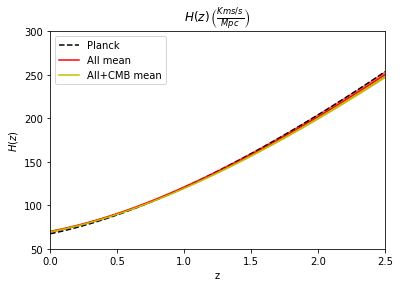

In [34]:
plt.plot(z_planck, Planck['Hkms_arr'], 'k--', label='Planck')

plt.plot(DESI_CMB['z_arr'],  H_All_mean_m, color ='r', label='All mean')
plt.fill_between(DESI_CMB['z_arr'], H_All_mean_m+H_All_mean_s,
                 H_All_mean_m-H_All_mean_s, color='r', alpha=.5)
plt.plot(DESI_CMB['z_arr'],  H_All_CMB_mean_m, color ='y', label='All+CMB mean')
plt.fill_between(DESI_CMB['z_arr'], H_All_CMB_mean_m+H_All_CMB_mean_s, 
                 H_All_CMB_mean_m-H_All_CMB_mean_s, color='y', alpha=.5)


# axis labels and title
plt.xlim(0, 2.5)
plt.ylim(50, 300)
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_data.pdf')  

# dM

In [35]:
dM_All_m, dM_All_s = get_m_s(CC_DS17_BOSS_eBOSS_Wigglez_DSS['dMz'])
dM_All_CMB_m, dM_All_CMB_s = get_m_s(CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB['dMz'])

dM_All_mean_m, dM_All_mean_s = get_m_s(CC_DS17_BOSS_eBOSS_Wigglez_DSS_mean['dMz'])
dM_All_CMB_mean_m, dM_All_CMB_mean_s = get_m_s(CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB_mean['dMz'])

dM_CC_DS17_Wigglez_DSS_m, dM_CC_DS17_Wigglez_DSS_s = get_m_s(CC_DS17_Wigglez_DSS['dMz'])
#dM_BOSS_eBOSS_m, dM_BOSS_eBOSS_s = get_m_s(BOSS_eBOSS['dMz'])
#dM_BOSS_eBOSS_CMB_m, dM_BOSS_eBOSS_CMB_s = get_m_s(BOSS_eBOSS_CMB['dMz'])
dM_DESI_CMB_m, dM_DESI_CMB_s = get_m_s(DESI_CMB['dMz'])
dM_DESI_FCMB_m, dM_DESI_FCMB_s = get_m_s(DESI_FCMB['dMz'])
dM_DESI_m, dM_DESI_s = get_m_s(DESI['dMz'])

dM_DESI_H_dA_CMB_m, dM_DESI_H_dA_CMB_s = get_m_s(DESI_H_dA_CMB['dMz'])
dM_DESI_H_dA_fs8_CMB_m, dM_DESI_H_dA_fs8_CMB_s = get_m_s(DESI_H_dA_fs8_CMB['dMz'])
dM_DESI_H_dA_fs8_m, dM_DESI_H_dA_fs8_s = get_m_s(DESI_H_dA_fs8['dMz'])

dM_DESI_H_dA_CMB_mean_m, dM_DESI_H_dA_CMB_mean_s = get_m_s(DESI_H_dA_CMB_mean['dMz'])
dM_DESI_H_dA_fs8_CMB_mean_m, dM_DESI_H_dA_fs8_CMB_mean_s = get_m_s(DESI_H_dA_fs8_CMB_mean['dMz'])
dM_DESI_H_dA_fs8_mean_m, dM_DESI_H_dA_fs8_mean_s = get_m_s(DESI_H_dA_fs8_mean['dMz'])

dM_DESI_mean_m, dM_DESI_mean_s = get_m_s(DESI_mean['dMz'])
dM_DESI_CMB_mean_m, dM_DESI_CMB_mean_s = get_m_s(DESI_CMB_mean['dMz'])
dM_DESI_FCMB_mean_m, dM_DESI_FCMB_mean_s = get_m_s(DESI_FCMB_mean['dMz'])

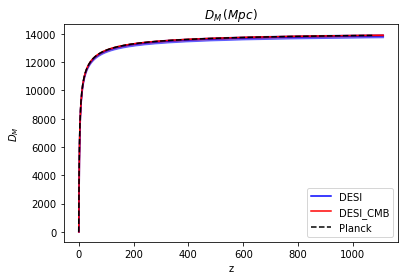

In [36]:
plt.plot(DESI['z_arr'],  dM_DESI_m, color ='b', label='DESI')
plt.fill_between(DESI['z_arr'], dM_DESI_m+dM_DESI_s,
                 dM_DESI_m-dM_DESI_s, color='b', alpha=.5)

plt.plot(DESI_CMB['z_arr'],  dM_DESI_CMB_m, color ='r', label='DESI_CMB')
plt.fill_between(DESI_CMB['z_arr'], dM_DESI_CMB_m+dM_DESI_CMB_s,
                 dM_DESI_CMB_m-dM_DESI_CMB_s, color='r', alpha=.5)

plt.plot(z_planck, Planck['dM_arr'], 'k--', label='Planck')
plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();

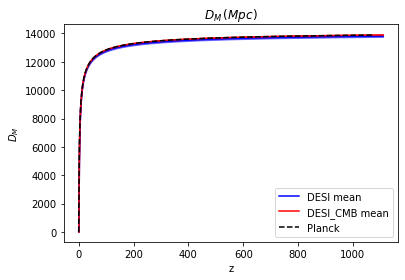

In [37]:
plt.plot(DESI_mean['z_arr'],  dM_DESI_mean_m, color ='b', label='DESI mean')
plt.fill_between(DESI_mean['z_arr'], dM_DESI_mean_m+dM_DESI_mean_s,
                 dM_DESI_mean_m-dM_DESI_mean_s, color='b', alpha=.5)

plt.plot(DESI_CMB_mean['z_arr'],  dM_DESI_CMB_mean_m, color ='r', label='DESI_CMB mean')
plt.fill_between(DESI_CMB_mean['z_arr'], dM_DESI_CMB_mean_m+dM_DESI_CMB_mean_s,
                 dM_DESI_CMB_mean_m-dM_DESI_CMB_mean_s, color='r', alpha=.5)

plt.plot(z_planck, Planck['dM_arr'], 'k--', label='Planck')
plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();

<ipython-input-38-c06a97d6a9eb>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(z_arr[:-1], 100*(dM_DESI_m[:-1]-Planck['dM_arr'])/Planck['dM_arr'], 'b', label='diff DESI')
<ipython-input-38-c06a97d6a9eb>:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(z_arr[:-1], 100*(dM_DESI_CMB_m[:-1]-Planck['dM_arr'])/Planck['dM_arr'], 'r', label='diff DESI_CMB')


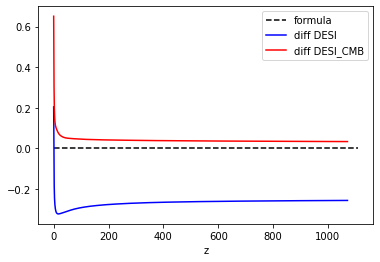

In [38]:
plt.plot(z_arr, np.zeros_like(z_arr), 'k--', label='formula')
plt.plot(z_arr[:-1], 100*(dM_DESI_m[:-1]-Planck['dM_arr'])/Planck['dM_arr'], 'b', label='diff DESI')
plt.plot(z_arr[:-1], 100*(dM_DESI_CMB_m[:-1]-Planck['dM_arr'])/Planck['dM_arr'], 'r', label='diff DESI_CMB')

plt.xlabel("z")
plt.legend();

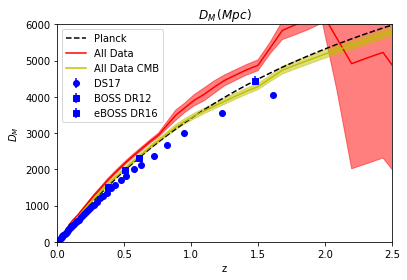

In [58]:
plt.plot(z_planck, Planck['dM_arr'], 'k--', label='Planck')

plt.errorbar(DS17_data['z'], (10**((DS17_data['data']-25+19.49)/5))/(1+DS17_data['z']),
             yerr=(10**(DS17_data['err']/5))/(1+DS17_data['z']), fmt='bo', label='DS17')
plt.errorbar(BOSS_data['z'], BOSS_data['perp_data'], yerr=BOSS_data['perp_err'], fmt='bs', label='BOSS DR12')
plt.errorbar(eBOSS_data['z'], eBOSS_data['perp_data']*eBOSS_data['rd'],
             yerr=np.array([0.79])*eBOSS_data['rd'], fmt='bs', label='eBOSS DR16')

plt.plot(DESI_CMB['z_arr'],  dM_All_m, color ='r', label='All Data')
plt.fill_between(DESI_CMB['z_arr'], dM_All_m+dM_All_s, dM_All_m-dM_All_s, color='r', alpha=.5)

plt.plot(DESI_CMB['z_arr'],  dM_All_CMB_m, color ='y', label='All Data CMB')
plt.fill_between(DESI_CMB['z_arr'], dM_All_CMB_m+dM_All_CMB_s, dM_All_CMB_m-dM_All_CMB_s, color='y', alpha=.5)

plt.xlim(0, 2.5)
plt.ylim(0, 6000)
plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_data.pdf')  

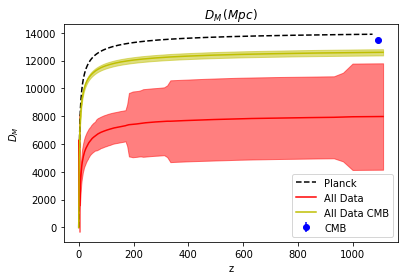

In [61]:
plt.plot(z_planck, Planck['dM_arr'], 'k--', label='Planck')
#plt.plot(z_DESIfs8, Panth_preds['Hkms_arr'], 'k-.', label='Panth')

plt.errorbar(CMB_data['z'], (1/CMB_data['data'])*(100*CMB_data['rd']),
             yerr=(1/CMB_data['err'])*1/(100*CMB_data['rd']), fmt='bo', label='CMB')

plt.plot(DESI_CMB['z_arr'],  dM_All_m, color ='r', label='All Data')
plt.fill_between(DESI_CMB['z_arr'], dM_All_m+dM_All_s, dM_All_m-dM_All_s, color='r', alpha=.5)

plt.plot(DESI_CMB['z_arr'],  dM_All_CMB_m, color ='y', label='All Data CMB')
plt.fill_between(DESI_CMB['z_arr'], dM_All_CMB_m+dM_All_CMB_s, dM_All_CMB_m-dM_All_CMB_s, color='y', alpha=.5)

plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_data.pdf')  

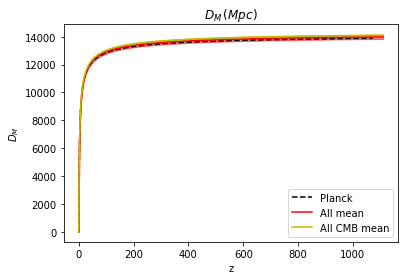

In [41]:
plt.plot(z_planck, Planck['dM_arr'], 'k--', label='Planck')
#plt.plot(z_DESIfs8, Panth_preds['Hkms_arr'], 'k-.', label='Panth')


plt.plot(DESI_CMB['z_arr'],  dM_All_mean_m, color ='r', label='All mean')
plt.fill_between(DESI_CMB['z_arr'], dM_All_mean_m+dM_All_mean_s,
                 dM_All_mean_m-dM_All_mean_s, color='r', alpha=.5)

plt.plot(DESI_CMB['z_arr'],  dM_All_CMB_mean_m, color ='y', label='All CMB mean')
plt.fill_between(DESI_CMB['z_arr'], dM_All_CMB_mean_m+dM_All_CMB_mean_s,
                 dM_All_CMB_mean_m-dM_All_CMB_mean_s, color='y', alpha=.5)

plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_data.pdf')  

# fs8

In [42]:
fs8_All_m, fs8_All_s = get_m_s(CC_DS17_BOSS_eBOSS_Wigglez_DSS['fs8z'])
fs8_All_CMB_m, fs8_All_CMB_s = get_m_s(CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB['fs8z'])

fs8_All_mean_m, fs8_All_mean_s = get_m_s(CC_DS17_BOSS_eBOSS_Wigglez_DSS_mean['fs8z'])
fs8_All_CMB_mean_m, fs8_All_CMB_mean_s = get_m_s(CC_DS17_BOSS_eBOSS_Wigglez_DSS_CMB_mean['fs8z'])

#fs8_BOSS_eBOSS_m, fs8_BOSS_eBOSS_s = get_m_s(BOSS_eBOSS['fs8z'])
#fs8_BOSS_eBOSS_CMB_m, fs8_BOSS_eBOSS_CMB_s = get_m_s(BOSS_eBOSS_CMB['fs8z'])
fs8_CC_DS17_Wigglez_DSS_m, fs8_CC_DS17_Wigglez_DSS_s = get_m_s(CC_DS17_Wigglez_DSS['fs8z'])
fs8_DESI_m, fs8_DESI_s = get_m_s(DESI['fs8z'])
fs8_DESI_CMB_m, fs8_DESI_CMB_s = get_m_s(DESI_CMB['fs8z'])
fs8_DESI_FCMB_m, fs8_DESI_FCMB_s = get_m_s(DESI_FCMB['fs8z'])

fs8_DESI_H_dA_fs8_CMB_m, fs8_DESI_H_dA_fs8_CMB_s = get_m_s(DESI_H_dA_fs8_CMB['fs8z'])
fs8_DESI_H_dA_fs8_m, fs8_DESI_H_dA_fs8_s = get_m_s(DESI_H_dA_fs8['fs8z'])

fs8_DESI_H_dA_fs8_CMB_mean_m, fs8_DESI_H_dA_fs8_CMB_mean_s = get_m_s(DESI_H_dA_fs8_CMB_mean['fs8z'])
fs8_DESI_H_dA_fs8_mean_m, fs8_DESI_H_dA_fs8_mean_s = get_m_s(DESI_H_dA_fs8_mean['fs8z'])

fs8_DESI_mean_m, fs8_DESI_mean_s = get_m_s(DESI_mean['fs8z'])
fs8_DESI_CMB_mean_m, fs8_DESI_CMB_mean_s = get_m_s(DESI_CMB_mean['fs8z'])
fs8_DESI_FCMB_mean_m, fs8_DESI_FCMB_mean_s = get_m_s(DESI_FCMB_mean['fs8z'])

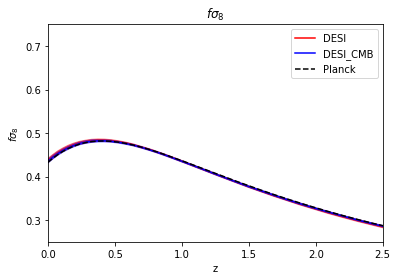

In [44]:
plt.plot(DESI['z_arr'],  fs8_DESI_m, color ='r', label='DESI')
plt.fill_between(DESI['z_arr'], fs8_DESI_m+fs8_DESI_s,
                 fs8_DESI_m-fs8_DESI_s, color='r', alpha=.5)


plt.plot(DESI_CMB['z_arr'],  fs8_DESI_CMB_m, color ='b', label='DESI_CMB')
plt.fill_between(DESI_CMB['z_arr'], fs8_DESI_CMB_m+fs8_DESI_CMB_s,
                 fs8_DESI_CMB_m-fs8_DESI_CMB_s, color='b', alpha=.5)

plt.plot(z_planck, Planck['fs8_arr'], 'k--', label='Planck')


plt.xlim(0, 2.5)
plt.ylim(0.25, 0.75)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();

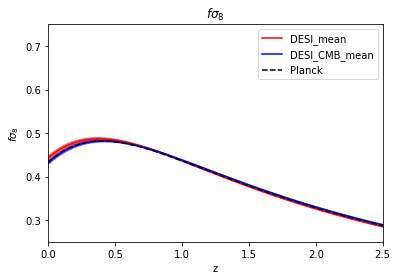

In [45]:
plt.plot(DESI_mean['z_arr'],  fs8_DESI_mean_m, color ='r', label='DESI_mean')
plt.fill_between(DESI_mean['z_arr'], fs8_DESI_mean_m+fs8_DESI_mean_s,
                 fs8_DESI_mean_m-fs8_DESI_mean_s, color='r', alpha=.5)


plt.plot(DESI_CMB_mean['z_arr'],  fs8_DESI_CMB_mean_m, color ='b', label='DESI_CMB_mean')
plt.fill_between(DESI_CMB_mean['z_arr'], fs8_DESI_CMB_mean_m+fs8_DESI_CMB_mean_s,
                 fs8_DESI_CMB_mean_m-fs8_DESI_CMB_mean_s, color='b', alpha=.5)

plt.plot(z_planck, Planck['fs8_arr'], 'k--', label='Planck')


plt.xlim(0, 2.5)
plt.ylim(0.25, 0.75)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();

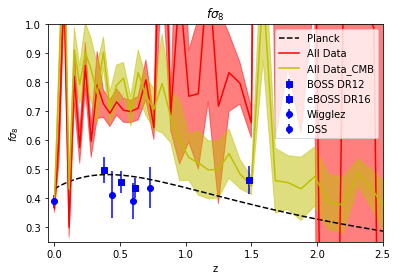

In [66]:
plt.plot(z_planck, Planck['fs8_arr'], 'k--', label='Planck')
plt.errorbar(BOSS_data['z'], BOSS_data['fs8_data'], yerr=BOSS_data['fs8_err'], fmt='bs', label='BOSS DR12')
plt.errorbar(eBOSS_data['z'], eBOSS_data['fs8_data'], yerr=eBOSS_data['fs8_err'], fmt='bs', label='eBOSS DR16')
plt.errorbar(Wigglez_data['z'], Wigglez_data['data'], yerr=Wigglez_data['err'], fmt='bo', label='Wigglez')
plt.errorbar(DSS_data['z'], DSS_data['data'], yerr=DSS_data['err'], fmt='bo', label='DSS')

plt.plot(DESI_CMB['z_arr'],  fs8_All_m, color ='r', label='All Data')
plt.fill_between(DESI_CMB['z_arr'], fs8_All_m+fs8_All_s, fs8_All_m-fs8_All_s, color='r', alpha=.5)

plt.plot(DESI_CMB['z_arr'],  fs8_All_CMB_m, color ='y', label='All Data_CMB')
plt.fill_between(DESI_CMB['z_arr'], fs8_All_CMB_m+fs8_All_CMB_s,
                 fs8_All_CMB_m-fs8_All_CMB_s, color='y', alpha=.5)

plt.xlim(-0.05, 2.5)
plt.ylim(0.25, 1)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_gp_data.pdf')  

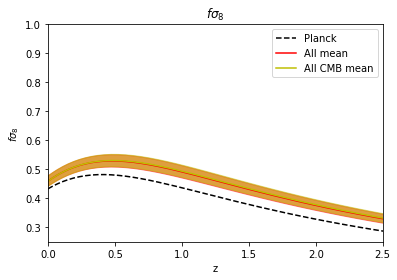

In [50]:
plt.plot(z_planck, Planck['fs8_arr'], 'k--', label='Planck')

plt.plot(DESI_CMB['z_arr'],  fs8_All_mean_m, color ='r', label='All mean')
plt.fill_between(DESI_CMB['z_arr'], fs8_All_mean_m+fs8_All_mean_s,
                 fs8_All_mean_m-fs8_All_mean_s, color='r', alpha=.5)

plt.plot(DESI_CMB['z_arr'],  fs8_All_CMB_mean_m, color ='y', label='All CMB mean')
plt.fill_between(DESI_CMB['z_arr'], fs8_All_CMB_mean_m+fs8_All_CMB_mean_s,
                 fs8_All_CMB_mean_m-fs8_All_CMB_mean_s, color='y', alpha=.5)

plt.xlim(0, 2.5)
plt.ylim(0.25, 1)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_gp_data.pdf')  